<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [79]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [80]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [81]:
# from js import fetch
import io
import requests

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

# boston_url = requests.get(URL)

In [82]:
boston_df=pd.read_csv(URL)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


For the "Median value of owner-occupied homes" provide a boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x22e2e0018b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e2e001e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e2e001610>],
 'medians': [<matplotlib.lines.Line2D at 0x22e2e0023f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e2e002660>],
 'means': []}

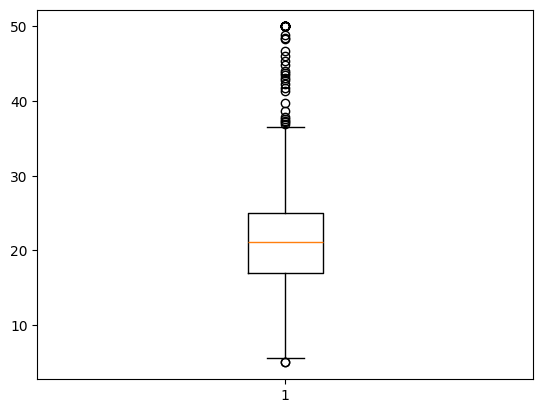

In [88]:
pyplot.boxplot(boston_df['MEDV'])


Provide a  bar plot for the Charles river variable

<Axes: xlabel='CHAS', ylabel='MEDV'>

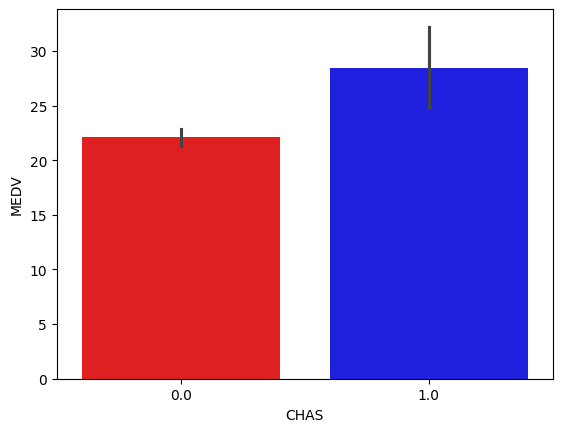

In [89]:

sns.barplot(x='CHAS', 
            y='MEDV', 
            palette=['red','blue'], 
            data=boston_df)




<Axes: xlabel='Age Group', ylabel='MEDV'>

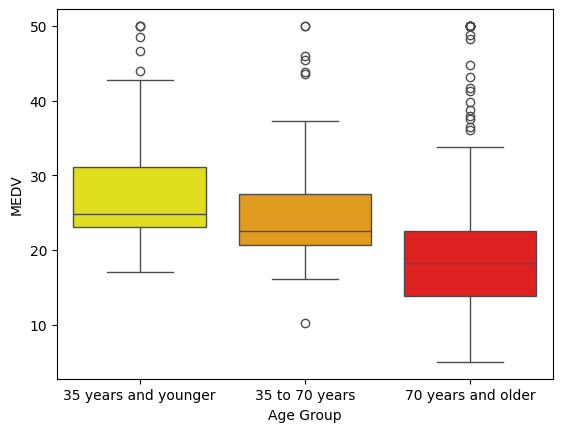

In [85]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age Group'] = '35 to 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'

sns.boxplot(x='Age Group', 
            y='MEDV', 
            palette=['yellow','orange','red'], 
            data=boston_df,
            order=['35 years and younger', '35 to 70 years', '70 years and older'])

<Axes: xlabel='INDUS', ylabel='NOX'>

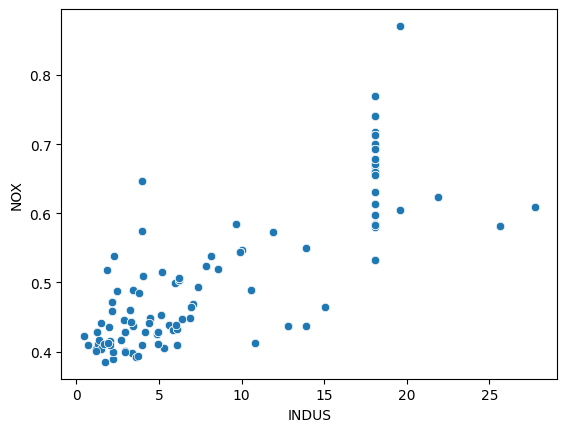

In [86]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the 
# proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# There appears to be a direct positive relationship between the number of non-retail businesses in a given
# area and the presence of nitric oxide concentraions




<Axes: xlabel='PTRATIO', ylabel='Count'>

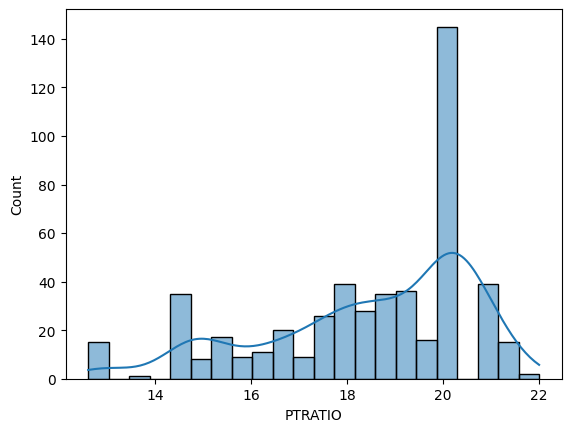

In [87]:
# Create a histogram for the pupil to teacher ratio variable
sns.histplot(x='PTRATIO', 
             bins=22, 
             kde=True, 
             data=boston_df)

##### 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

NULL HYPOTHESIS: There is no statistically significant difference in median values of houses bounded by the Charles River.

ALT HYPOTHESIS: There IS a statistically significant difference in median values of houses bounded by the Charles River.

In [95]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

CONCLUSION: The p-value indicates there IS a statistically-significant difference in the media value of homes bounded by the Charles river. The null hypothesis is rejected.

##### 2) PROBLEM: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

NULL HYPOTHESIS: There is no statistically significant relationship between median home values and proportion of owner-occupied units built prior to 1940.

ALT HYPOTHESIS: There IS a statistically significant relationship between median home values and proportion of owner-occupied units built prior to 1940.

In [129]:
groups = [boston_df['MEDV'][boston_df['Age Group'] == group] for group in boston_df['Age Group'].unique()]
f_stat, p_val = scipy.stats.f_oneway(*groups)
print(f'The f-statistic is:{f_stat}, the P-Value is: {p_val}')

The f-statistic is:36.40764999196599, the P-Value is: 1.7105011022702984e-15


CONCLUSION: Since the p-value is well below .05, the null is rejected. There is a statistically-significant difference in median home values built prior to 1940.

##### 3) PROBLEM: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

NULL HYPOTHESIS: There is no statistically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. 

ALT HYPOTHESIS: There IS a stat istically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

In [121]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

CONCLUSION: Since the p-value is smaller than .05, the null is rejected and it is shown there is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

##### 4) PROBLEM: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

NULL HYPOTHESIS: There is no statistically significant relationship between weighted distance and the median value of homes.

ALT HYPOTHESIS: There IS a statistically significant relationship between weighted distance and the median value of homes.

In [128]:

x = boston_df['DIS'].tolist()
y = boston_df['MEDV'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        09:46:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

CONCLUSION: Since the coefficient is 1.0916, the null hypothesis is rejected. There is a statistically significant relationship between weighted distance and median home values.